In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

A clear version of http://neconomides.stern.nyu.edu/networks/Shapley_A_value_for_n-person_games.pdf.

Suppose we'd like to come up with a formula for a value that calculates the division of payoff among of a gorup of players for a game $v$. We'll denote this value as $\phi_i(v)$ for the $i$th player, and it needs satisfy the following three axioms.

### Axiom 1

For each permutation $\pi$ in $\Pi(N)$, where $N$ is the universe of all players,

$$
\phi_{\pi(i)} (\pi v) = \phi_i(v)
$$

Here $v$ is a $2^{n - 1}$-dimension vector indexed by $i$, and $\pi v$ is a vector with reordered elements and can be indexed by $\pi(i)$.

<span style="color:red">The formulation of $v$ as a vector here is confusion, needs better notations here</span>

### Axiom 2

For each carrier $C$ of $v$,

$$
\sum_{i \in C} \phi_i(v) = v(C) = v(N)
$$

Note a carrier is a subset of $C$ that includes all the influential players and perhaps some non-influential players, so $v(S) = v(C \cap S)$.

### Axiom 3

For any two games $v$ and $w$,

$$
\phi_i(v + w) = \phi_i(v) + \phi_i(w)
$$

### Lemma 1

If $C$ is a finite carrier of $v$, then for $j \notin C$,

$$
\phi_j(v) = 0
$$.

Proof: since $C$ and $C \cup \{j\}$ are both carriers, by Axiom 2,

\begin{align*}
\sum_{i \in C} \phi_i(v) =& v(C) = v(N) \\
\sum_{i \in C \cup \{j \}} \phi_i(v) =& v(N \cup \{j \}) = v(N)
\end{align*}


so $\phi_j(v) = 0$

In other words, $j$ is a dummy player. The carrier axiom integrates both efficiency and dummy axioms as described in later literatures.

### Lemma 2

Define a game 

\begin{align*}
  w_R(S) =
  \begin{cases}
    1, & \text{if}\ S \supseteq  R \\
    0, & \text{otherwise}
  \end{cases}
\end{align*}

where both $S \subseteq N$ and $R \subseteq N, R \neq \emptyset$ (<span style="color:red">Not sure if the emptyset part matters</span>).

We'll use $s, r, n \dots$ to denote the size of sets $S, R, N \dots$.

The game $w_R$ can be thought as such: given $R$, it calculates the payoffs for all subsets ($S$) of $N$, therefore, we can define $2^{n - 1}$ ($R \neq \emptyset$) of such games.

Note,

* when $S \supseteq R$, $w_R(R \cap S) = w_R(R) = w_R(S) = 1$
* when $S \subseteq R$, $w_R(R \cap S) = w_R(S) = 0$
* otherwise, $w_R(R \cap S) = 0$ since $(R \cap S) \subset R$, and $w_R(S) = 0$, so $w_R(R \cap S) = w_R(S)$.

Therefore, we always have

$$
w_R(S) = w_R(R \cap S)
$$.

i.e. $R$ is a carrier of $w_R(S)$.

Now, the lemma is that for $w_R(S)$,

\begin{align*}
  \phi_i(w_R) =
  \begin{cases}
    1 / r, & \text{if}\ i \in  R \\
    0, & \text{otherwise}
  \end{cases}
\end{align*}

Proof:

Given the definition of $w_R$ and players in $R$ are indistinguishable, so they all get the same payoff.

### Lemma 3

$v$ is a linear combination of $2^{n} - 1$ $w_R$s:

\begin{align*}
v 
&= \sum_{R \subseteq N, R \neq \emptyset} c_R(v) w_R \\
\end{align*}

where

$$
c_R(v) = \sum_{T \subseteq R} (-1)^{r - t} v(T)
$$

<span style="color:red">This coefficient seems magical.</span>

Now, we prove for any subset $S \subseteq N$,

\begin{align*}
v(S)
&= \sum_{R \subseteq N, R \neq \emptyset} c_R(v) w_R(S) \\
\end{align*}

Transforming the right-hand side,

\begin{align}
\sum_{R \subseteq N, R \neq \emptyset} c_R(v) w_R(S)
&= \sum_{R \subseteq S} c_R(v) \\
&= \sum_{R \subseteq S} \sum_{T \subseteq R} (-1)^{r - t} v(T) \\
&= \sum_{T \subseteq S} \sum_{T \subseteq R \subseteq S} (-1)^{r - t} v(T) \\
&= \sum_{T \subseteq S} \sum_{r=t}^s \binom{s - t}{r - t} (-1)^{r - t} v(T) \\
&= \sum_{T \subseteq S} \sum_{j=0}^{s - t} \binom{s - t}{j} (-1)^{j} v(T) \\
&= \sum_{T \subseteq S} (1 - 1)^{s - t} v(T) \\
&= \sum_{T \subseteq S} \mathbb{I}(S = T) v(T) \\
&= v(S)
\end{align}

Note,

* 1st equality is by defintion of $w_R$
* 3rd equality is by chain of order of summation. Intuition: instead of picking R from S, and then picking T from R, we can also pick T from S first, and then pick R that is a superset of T yet a subset of S.
* 4th equality used the fact that for each $s$ and $t$, there is $\binom{s - t}{r - t}$ ways to pick a set of size $r$.
* 5th equality: we replaced $r - t$ with $j$.
* 6th equality used the fact that $(1 - x)^k = \sum_{j=0}^k \binom{k}{j} (-x)^j$.
* 7th equality: note, $(1 - 1)^{s - t}$ is zero except when $s = t$, i.e. $S = T$.

### Corollary

Given we know $\phi_i(w_R) = 1 / r$, we can calculate $\phi_i(v)$ based on Axiom 3,

\begin{align}
\phi_i(v)
&= \sum_{R \subseteq N} c_R(v) \phi_i(w_R) \\
&= \sum_{R \subseteq N \\ i \in R} c_R(v) \frac{1}{r} \\
&= \sum_{\substack{R \subseteq N \\ i \in R}} \sum_{T \subseteq R} (-1)^{r - t} v(T) \frac{1}{r} \\
&= \sum_{T \subseteq N} \sum_{\substack{T \subseteq R \subseteq N \\ i \in R}} (-1)^{r - t} v(T) \frac{1}{r} \\
&= \sum_{T \subseteq N} \gamma_i(T) v(T) \\
\end{align}

Note,

* 2nd equality, if $i \notin R$, $\phi_i(w_R) = 0$.
* 4th equality, result of change of order of summation.
* 5th equality, we set $\sum_{\substack{T \subseteq R \subseteq N \\ i \in R}} (-1)^{r - t} \frac{1}{r} = \gamma_i(T)$

Considering the definition of $\gamma_i(T)$

$$
\gamma_i(T) = \sum_{\substack{T \subseteq R \subseteq N \\ i \in R}} (-1)^{r - t} \frac{1}{r}
$$

It's apparent that if $i \notin T$, then 

$$
\gamma_i(T \cup \{ i \}) = - \gamma_i(T)
$$

So $\phi_i(v)$ can be rewritten as

\begin{align*}
\phi_i(v)
& = \sum_{T \subseteq N \backslash i} \gamma_i(T \cup \{ i \}) v (T \cup \{i\}) + \gamma_i(T) v(T) \\
& = \sum_{T \subseteq N \backslash i} \gamma_i(T \cup \{ i \}) \Big[ v (T \cup \{i\}) - v(T) \Big] \\
\end{align*}

Further transforming $\gamma_i(T \cup \{i\})$,

\begin{align}
\gamma_i(T \cup \{i\})
&= \sum_{\substack{T \cup \{i\} \subseteq R \subseteq N \\ i \notin T}} (-1)^{r - t - 1} \frac{1}{r} \\
&= \sum_{r = t + 1}^n \binom{n - t - 1}{r - t - 1} (-1)^{r - t - 1} \int_0^1 x^{r - 1} dx \\
&= \sum_{j = 0}^{n - t - 1} \binom{n - t - 1}{j}(-1)^j \int_0^1 x^{j + t} dx \\
&= \int_0^1 \sum_{j = 0}^{n - t - 1} \binom{n - t - 1}{j}(-1)^j x^{j + t} dx \\
&= \int_0^1 (1 - x)^{n - t -1} x^t dx \\
&= \frac{t! (n - t - 1)!}{n!}
\end{align}

Note,

* 2nd equality used two facts:
  * for each n and t, there are $binom{n - t - 1}{r - t -1}$ ways to pick a set of size $r$.
  * $\frac{1}{r} = \int_0^1 x^{r-1} dx$.
* 3rd equality, we replaced $r - t - 1$ with $j$.
* 4th equality just moved the integral to the front.
* 5th equality used the fact that $(1 - x)^k = \sum_{j=0}^k \binom{k}{j} (-x)^j$.
* 6th equality used the fact that $\int_0^1 x^{s-1}(1 - x)^{n - s} dx = \frac{(s - 1)! (n - s)!}{n!}$ (http://www.sef.hku.hk/~schiu/6036/shapleyproof.pdf).


Therefore, we get the familiar equation for Shapley value:

\begin{align*}
\phi_i(v)
& = \sum_{T \subseteq N \backslash i} \frac{t! (n - t - 1)!}{n!} \Big[ v (T \cup \{i\}) - v(T) \Big] \\
\end{align*}

TODO: prove $c_R$ is unique if $v$ is a linear combination of $w_R$s.

Ref:

* http://neconomides.stern.nyu.edu/networks/Shapley_A_value_for_n-person_games.pdf
* http://www.sef.hku.hk/~schiu/6036/shapleyproof.pdf
* https://gtl.csa.iisc.ac.in/gametheory/ln/web-cp5-shapley.pdf

https://www.wolframalpha.com/input?i=%5Cint_0%5E1+x%5E%7Bs-1%7D+%281+-+x%29%5E%7Bn+-s%7D

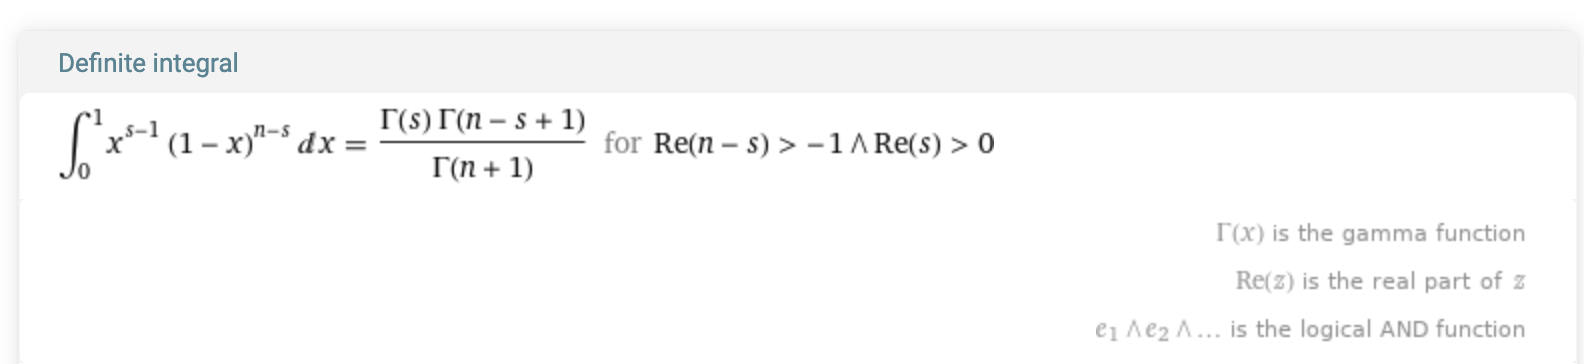